In [5]:
import pandas as pd

# Load the uploaded CSV file to inspect its contents

covid_data = pd.read_csv("COVID.CSV")

# Display the first few rows and basic information about the dataset
covid_data.head(), covid_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433920 entries, 0 to 433919
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_reported      433920 non-null  object 
 1   Country_code       432112 non-null  object 
 2   Country            433920 non-null  object 
 3   WHO_region         433920 non-null  object 
 4   New_cases          207589 non-null  float64
 5   Cumulative_cases   433920 non-null  int64  
 6   New_deaths         208524 non-null  float64
 7   Cumulative_deaths  433920 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 26.5+ MB


(  Date_reported Country_code               Country WHO_region  New_cases  \
 0    2020-01-04           SB       Solomon Islands        WPR        0.0   
 1    2020-01-04           LK             Sri Lanka       SEAR        0.0   
 2    2020-01-04           SY  Syrian Arab Republic        EMR        NaN   
 3    2020-01-04           TJ            Tajikistan        EUR        NaN   
 4    2020-01-04           TH              Thailand       SEAR        0.0   
 
    Cumulative_cases  New_deaths  Cumulative_deaths  
 0                 0         0.0                  0  
 1                 0         0.0                  0  
 2                 0         NaN                  0  
 3                 0         NaN                  0  
 4                 0         0.0                  0  ,
 None)

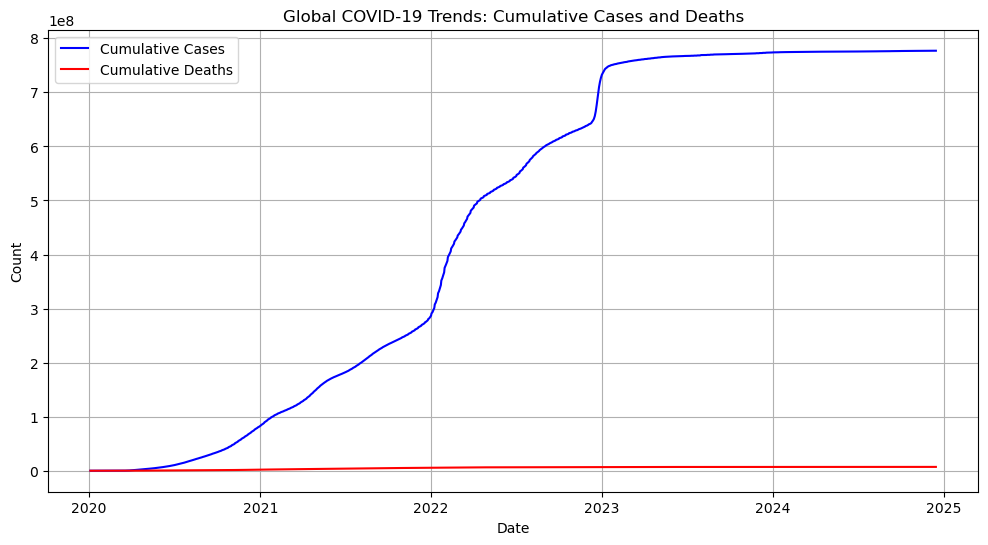

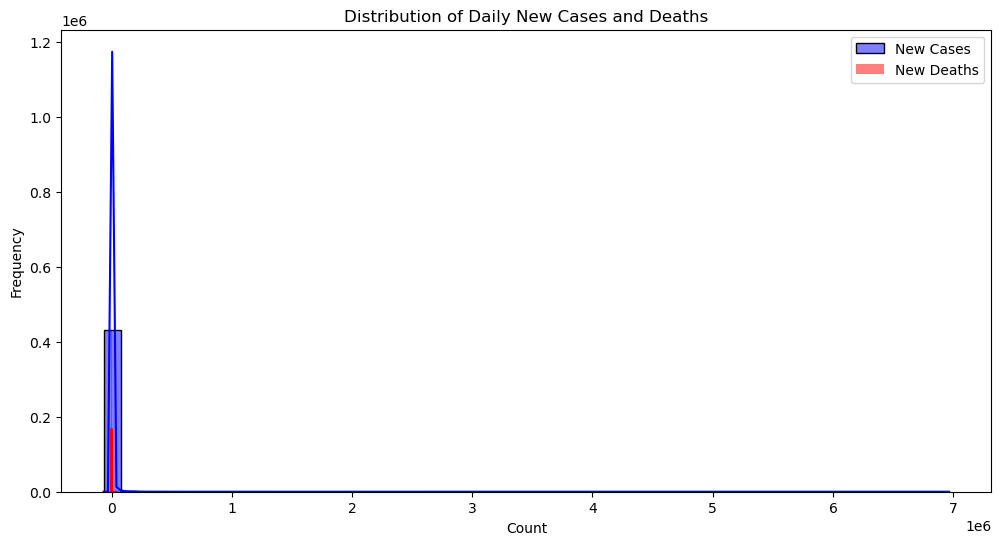

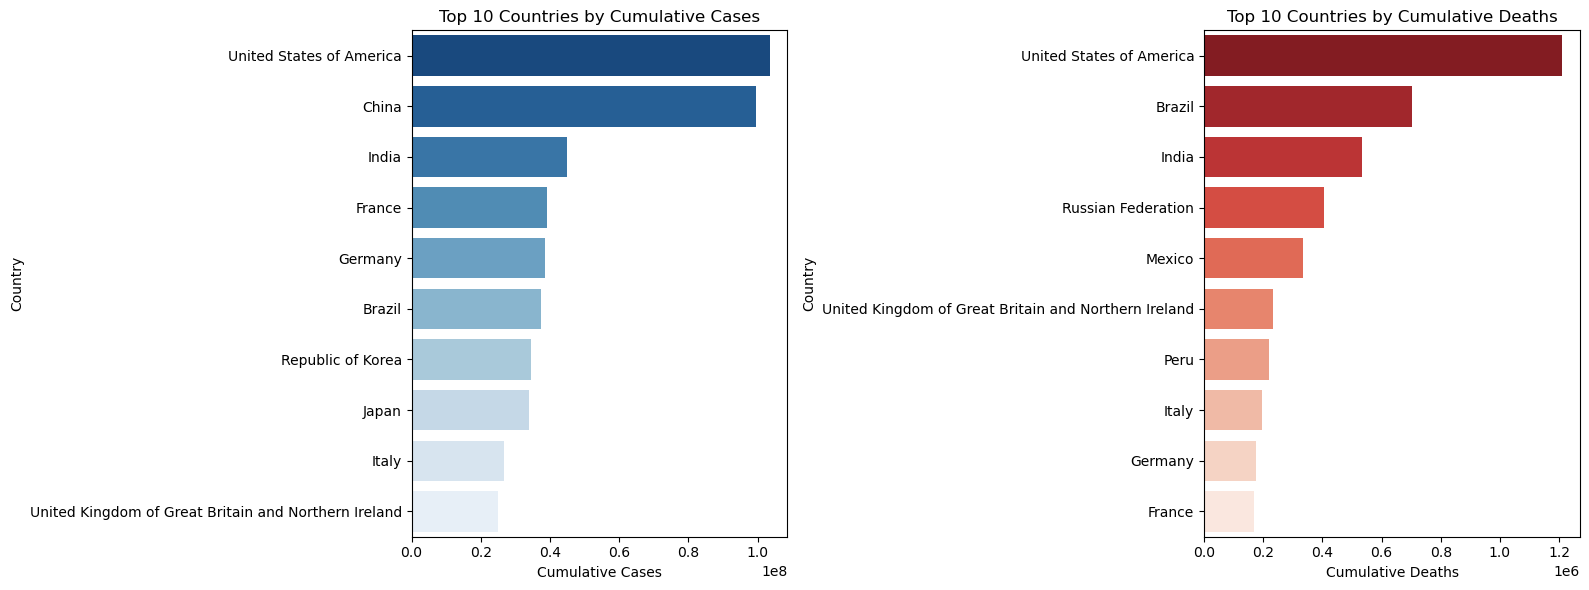

In [6]:
# Convert the Date_reported column to datetime format
covid_data['Date_reported'] = pd.to_datetime(covid_data['Date_reported'])

# Handle missing values: Fill 'New_cases' and 'New_deaths' with 0 (assuming unreported = 0)
covid_data['New_cases'] = covid_data['New_cases'].fillna(0)
covid_data['New_deaths'] = covid_data['New_deaths'].fillna(0)

# Global trends: Summarize daily data
global_trends = covid_data.groupby('Date_reported')[['New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']].sum()

# Plot cumulative cases and deaths over time
plt.figure(figsize=(12, 6))
plt.plot(global_trends.index, global_trends['Cumulative_cases'], label='Cumulative Cases', color='blue')
plt.plot(global_trends.index, global_trends['Cumulative_deaths'], label='Cumulative Deaths', color='red')
plt.title('Global COVID-19 Trends: Cumulative Cases and Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

# Distribution of new cases and deaths
plt.figure(figsize=(12, 6))
sns.histplot(covid_data['New_cases'], bins=50, kde=True, color='blue', label='New Cases')
sns.histplot(covid_data['New_deaths'], bins=50, kde=True, color='red', label='New Deaths')
plt.title('Distribution of Daily New Cases and Deaths')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Top 10 countries by cumulative cases and deaths
top_countries_cases = covid_data.groupby('Country')['Cumulative_cases'].max().sort_values(ascending=False).head(10)
top_countries_deaths = covid_data.groupby('Country')['Cumulative_deaths'].max().sort_values(ascending=False).head(10)

# Plot top 10 countries
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(y=top_countries_cases.index, x=top_countries_cases.values, ax=axes[0], palette="Blues_r")
axes[0].set_title('Top 10 Countries by Cumulative Cases')
axes[0].set_xlabel('Cumulative Cases')

sns.barplot(y=top_countries_deaths.index, x=top_countries_deaths.values, ax=axes[1], palette="Reds_r")
axes[1].set_title('Top 10 Countries by Cumulative Deaths')
axes[1].set_xlabel('Cumulative Deaths')

plt.tight_layout()
plt.show()


In [ ]:
"""How It Works:
Data Preparation:

Converts the Date_reported column to datetime.
Handles missing values by filling them with 0.
Global Trends:

Aggregates daily global totals for new and cumulative cases and deaths.
Plots the cumulative trends over time.
Distribution:

Plots histograms with KDEs for New_cases and New_deaths to explore their distribution.
Top Countries:

Identifies the top 10 countries by cumulative cases and deaths.
Plots bar charts to visualize the impact on these countries."""

#EDA

"""
-> Handling missing values in key columns (New_cases, New_deaths).
-> Visualizing trends in cumulative cases and deaths globally and by region.
-> Analyzing the distribution of new cases and deaths.
-> Highlighting the top affected countries."""